# 03 Lasso Regression

![viz](https://static.vecteezy.com/system/resources/previews/000/184/369/original/flat-data-visualization-vector.jpg)

# y = intercept + slope(s) * Variable(s)

main_performance = 1 + 2.1 * Coding_Exercise + 0 * Zodiac_Sign

## 1 Regularization

What is Regularization? Is a way of introducing penalties to (linear) models that are too simple or too complex while adjusting the coefficients to make them generalize better to new data. Another way to think about regularization is as penalties applied to regressions whose coefficients have become too large, and thus, sensitive to all kinds of inputs. These penalties, most notably L1 and L2, minimize the size of the coefficients and/or remove them completely. Here are two of the most important regularization methods.

1. Ridge - Also called L2 penalty, is a regularization method (and an extension of linear regression) that forces the model parameters to stay as small as possible but without reaching zero. The parameter we optimize is called lambda ($\lambda$) and it is usually initialized with the value 1.
2. Least Absolute Shrinkage and Selection Operator (LASSO) - Lasso is another type of linear regression model where the coefficients of the variables that don't contribute much to a model, and whose coefficients are too large, will be effectively reduced to zero and removed/ignored by the model. The parameter we optimize is called lambda ($\lambda$) and it is usually initialized with the value 1. In Python's scikit-learn package the parameter we optimise for is called `alpha`.


Some Important Terms:
- Overfitting: happens when your model fits the data too well or, more specifically, when it memorizes the training data and thus, fails to generalize well to new data. Another term used to refer to overfitting is high-variance. This is also a symptom of having too complex a model, e.g. a model with too many variables and not that many observations.
- Underfitting: happens when your model is too simple and fails to capture the relationship between the target variable and the features.
- bias-variance trade-off: having a good balance between the two above.

## 2 Analysis

In [1]:
import pandas as pd # data manipulation and analysis package
import numpy as np # numerical computing package
import matplotlib.pyplot as plt # data visualisation package
pd.options.display.max_columns = None # global setting for our session that allows us to see all the columns

# machine learning functions we will need
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Import the data using pandas.

In [2]:
df = pd.read_csv('Hyp_attrition_bigdata.csv')
df.head() # show the first 5 rows, add a number to the parentheses to see more rows

,new_id,quitnow,age,gender,teamrelationship,jobsatisfaction,managerrelationship,tenure,relativepay,deniedpromotion,seniorityrank,mainperformancemetric,noofchildren,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,variable22,variable23,variable24,variable25,variable26,variable27,variable28,variable29,variable30,variable31,variable32,variable33,variable34,variable35,variable36,variable37,variable38,variable39,variable40,variable41,variable42,variable43,variable44,variable45,variable46,variable47,variable48,variable49,variable50,variable51,variable52,variable53,variable54,latedaysscore,latedays,sickdaysscore,sickdays,projectsrefusedscore,projectsrefused,hrpolicycheckscore,hrpolicycheck,linkedinupdatescore,linkedinupdate,linkedinminutesscore,linkedinminutes,twitterminutesscore,twitterminutes,facebookminutesscore,facebookminutes,instagramminutesscore,instagramminutes,careersearches,linkedinposts,facebookpostsscore,facebookposts,instagrampostsscore,instagramposts,twitterpostsscore,twitterposts,emailswearscore,emailswear,colemailtimescore,colemailtime,supemailtimescore,emailtime,cliemailtimescore,cliemailtime,emailothdeptscore,emailothdept,emailfromothdeptscore,emailfromothdept,zoomcallsscore,zoomcalls,dropzoomcalls,dropzoomcall
0,1,0,36,1,1.043424,7,8,7,1.069349,0,3,4,0,0.769387,0.400122,1.069387,0.366629,0.813300,1.299764,1.042025,0.511582,1.297280,0.307247,0.713798,1.099708,0.617806,0.433152,1.326074,0.197200,0.425507,0.898387,1.376532,0.812476,0.794455,0.867224,0.182914,1.103101,1.136733,0.700220,0.142396,0.314008,0.949411,0.770421,0.448736,0.165476,-0.315617,0.768881,1.063120,-0.291023,0.805473,1.197648,0.660831,0.744014,0.809809,1.161176,0.875866,0.900378,-0.499514,-0.061940,0.396440,0.317359,0.879509,0.615891,1.563389,1.127221,0.959102,0.206529,-0.837827,0,-0.224683,0,-0.229223,0,-0.904479,0,-1.680648,0,-1.493460,0,1.467966,979,-0.672853,0,0.978259,1584,-1.942150,0,0.918659,2,0.246618,1,0.783136,3,2.539645,10,-0.823852,203,-1.733171,5,0.279823,8,2.804702,28,1.733737,17,0.379915,8,-0.528657,0
1,2,0,34,1,1.477468,7,7,5,1.005880,0,3,5,0,0.401959,0.036899,0.481751,0.649290,0.451087,0.412242,0.309533,0.390676,0.136553,0.094345,0.573500,0.431709,0.486921,0.449827,0.689654,0.536938,0.364873,-0.023814,0.408419,0.322823,0.715317,0.400562,0.416738,0.476487,0.533892,0.578756,0.437281,0.240450,0.304383,0.633248,0.522646,0.513821,0.127337,0.284162,0.650955,0.144927,0.191199,0.205858,0.384183,0.712641,0.362448,0.627873,0.546642,0.425571,0.088023,0.548627,-0.003822,0.332883,0.408493,0.393803,0.361417,0.476613,0.314743,0.646490,-1.358525,0,-1.032334,0,-1.434935,0,-1.620058,0,-1.157657,0,-3.312753,0,-1.840304,0,-1.058134,0,0.218437,354,-1.886332,0,0.857459,2,0.664642,3,0.326137,1,2.513962,10,-1.794997,201,-2.658862,5,-1.575334,8,1.929624,19,1.846834,18,0.382315,8,-1.240104,0
2,3,0,34,1,1.090165,1,4,4,0.827088,0,1,3,0,0.260099,1.269127,0.550456,0.221835,1.521664,1.296655,1.191918,0.966787,0.687076,1.003596,0.872186,1.326204,0.579935,0.812039,0.629508,0.700383,1.798338,1.078138,1.603472,1.221550,0.639968,0.703533,0.983418,0.546291,0.933750,0.324514,0.308308,1.000195,1.546240,0.667449,0.954757,0.900575,0.423047,0.821943,-0.140216,0.590296,1.386824,0.775188,0.396988,1.918280,0.549478,0.774416,0.751399,0.061873,1.404400,0.428000,0.933155,0.586712,1.263924,1.148351,0.547206,0.317607,0.484635,2.048633,-1.766083,0,-0.340622,0,2.111038,11,0.149151,0,-0.411703,0,0.825857,308,2.211585,1475,-0.277187,0,1.027498,1664,-0.359420,0,0.892386,2,1.238380,5,0.397391,2,1.779119,7,0.738860,142,2.835945,170,-1.169960,8,2.508919,25,2.584113,26,0.805312,16,0.330272,10
3,4,0,27,1,1.286620,7,9,0,1.120130,0,1,3,0,0.936036,0.515908,1.247329,0.672339,0.611360,1.395213,1.459479,0.849338,0.118669,0.419047,0.888147,-0.190592,1.129189,0.364189,0.292143,0.505030,0.107734,0.536593,0.685572,1.261601,1.190437,0

Let's look at the shape of our dataset.

In [3]:
df.shape

(201, 109)

Let's now select the columns that we will use for the models and take the id and target variables out.

In [4]:
train_vars = df.drop(['new_id', 'quitnow'], axis=1).columns
print(train_vars.shape)
print(train_vars[:5])

(107,)
Index(['age', 'gender', 'teamrelationship', 'jobsatisfaction',
       'managerrelationship'],
      dtype='object')


We now split our dataset into a training and a testing set. The training set will help us build and fine-tune the algorithm while the testing set will help us evaluate how the model performs with unseen data. We will use sklearn's `train_test_split` function and select and add 4 parameters to it
- `array1` - our predictors or independent variables whose sample we want to split. This will return 2 datasets
- `array2` - our target or dependent variables whose sample we want to split. This will return 2 arrays
- `train_size` - the size of the training dataset. A number between 0 and 1 will split any datasets and/or arrays by that percentage. An integer will add that amount of rows to the training dataset
- `random_state` - a seed to make sure our results are reproducible

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, df['quitnow'], train_size=102, random_state=7)

Evaluate one of the datasets.

In [6]:
X_train[train_vars].head()

,age,gender,teamrelationship,jobsatisfaction,managerrelationship,tenure,relativepay,deniedpromotion,seniorityrank,mainperformancemetric,noofchildren,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,variable22,variable23,variable24,variable25,variable26,variable27,variable28,variable29,variable30,variable31,variable32,variable33,variable34,variable35,variable36,variable37,variable38,variable39,variable40,variable41,variable42,variable43,variable44,variable45,variable46,variable47,variable48,variable49,variable50,variable51,variable52,variable53,variable54,latedaysscore,latedays,sickdaysscore,sickdays,projectsrefusedscore,projectsrefused,hrpolicycheckscore,hrpolicycheck,linkedinupdatescore,linkedinupdate,linkedinminutesscore,linkedinminutes,twitterminutesscore,twitterminutes,facebookminutesscore,facebookminutes,instagramminutesscore,instagramminutes,careersearches,linkedinposts,facebookpostsscore,facebookposts,instagrampostsscore,instagramposts,twitterpostsscore,twitterposts,emailswearscore,emailswear,colemailtimescore,colemailtime,supemailtimescore,emailtime,cliemailtimescore,cliemailtime,emailothdeptscore,emailothdept,emailfromothdeptscore,emailfromothdept,zoomcallsscore,zoomcalls,dropzoomcalls,dropzoomcall
8,40,0,1.380657,8,6,12,1.355433,0,3,6,0,0.761499,1.125505,1.042085,1.425595,0.931584,0.650082,0.561955,0.525768,-0.189234,0.953361,0.368784,0.301358,2.167311,1.149707,0.779795,1.019935,0.436615,1.412556,0.678113,1.141849,-0.310761,0.925759,1.235392,1.427483,1.853841,1.423425,0.062540,1.491218,0.587402,1.586663,0.795773,0.790481,1.501263,1.452781,0.706040,1.107430,0.631908,0.888146,1.102696,1.582478,0.653557,1.787093,1.007249,0.746319,1.104763,0.301826,1.003241,0.370415,0.518855,0.621497,0.848682,0.429203,0.067999,0.620003,-0.699107,0,0.752616,4,1.794874,9,-0.388518,0,-1.355993,0,-1.156692,0,-1.720583,0,0.728070,395,0.730691,1183,-0.064667,0,1.808790,4,0.935653,4,0.751130,3,2.904484,12,-0.180143,232,0.103555,6,-1.957033,8,2.025659,20,2.134826,21,1.291652,26,-1.691561,0
104,29,1,1.404278,6,9,2,1.139601,1,1,4,0,0.223610,0.520192,1.218750,0.539814,0.533374,1.149545,0.724338,1.496851,0.847196,0.392883,0.455590,1.311004,0.912948,0.484127,0.595863,1.133722,1.173232,0.680323,1.226589,0.466076,0.026180,0.691192,0.862876,0.477849,1.312427,0.301284,0.797308,0.021410,1.159204,0.515261,0.448236,-0.062115,0.491428,1.308530,1.709537,0.892535,1.514277,0.596444,1.274977,1.055113,1.066588,0.732060,0.640988,1.252502,1.070688,0.826808,0.585323,0.783601,0.447961,0.257504,0.965771,0.347335,0.534917,1.880312,-0.372859,0,-0.291343,0,1.280980,6,-0.411198,0,-0.130116,0,-0.165823,0,0.913842,610,0.670265,363,1.229933,1991,0.815554,2,1.539631,3,0.396694,2,0.679038,3,0.585864,2,0.075795,47,-0.187055,5,-0.337254,8,3.161129,32,0.952839,10,0.656166,13,0.068994,2
79,30,1,1.139534,6,9,2,1.111204,0,1,4,0,0.432580,-0.044694,0.475186,0.482547,0.147726,0.999924,0.689277,0.823352,0.534938,0.928407,0.578390,0.402424,1.099835,0.298994,0.589098,0.959271,0.650360,1.193331,-0.074088,-0.124572,0.944963,0.520724,0.441956,0.434897,1.156282,0.358852,0.516950,0.740427,0.648335,0.242439,0.914876,0.204092,0.360104,-0.031376,-0.019347,0.708268,0.066390,1.204982,0.500754,0.795177,1.042146,0.476057,0.685837,0.299799,0.739354,0.567844,0.303670,0.991310,0.703882,0.744820,0.556288,0.928430,0.011349,0.302195,-1.556428,0,-1.514331,0,-0.850885,0,-0.995377,0,-2.142098,0,0.282241,105,-1.975645,0,-1.134444,0,0.789446,1278,-0.390208,0,0.373361,1,0.416321,2,0.741538,3,2.710099,11,-1.699196,217,-1.666256,5,-0.348399,8,3.041151,30,0.918359,9,1.027149,21,-0.796488,0
125,40,0,1.092275,6,4,11,1.371059,0,3,5,0,1.456262,1.854882,0.974430,0.912974,1.319730,1.022447,2.241518,1.525154,0.614826,0.867734,1.668144,0.661291,2.192497,1.331320,0.846417,-0.199686,0.913944,1.169397,1.979952,0.366808,1.430251,0.957054,0.890109,0.413306,0

Modeling without scaling. This means that we will be evaluating the model with the data as is.

In [7]:
lasso = Lasso() # first we instantiate (i.e. create and initialize) a variable with our model
lasso.fit(X_train[train_vars], y_train) # we then fit the training

Lasso()

In [10]:
print("Training set score: {:.2f}".format(lasso.score(X_train[train_vars], y_train))) # let's now evaluate the R2 of our model with training data only
print("Test set score: {:.2f}".format(lasso.score(X_test[train_vars], y_test))) # let's now evaluate the R2 of our model with testing data only
print("Number of columns used: {}".format(np.sum(lasso.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.37
Test set score: 0.10
Number of columns used: 6


Let's now try a different model with a smaller penalty and run more iterations of the regression. We will the following parameters
- `alpha=` lambda is the main parameter of a lasso regression, and thus, what helps us penalize the coefficients
- `random_state=` a seed for reproducibility purposes
- `max_iter=` the amount of times the model will run in search of convergeance, i.e. the best fit for the line

In [11]:
lasso_2 = Lasso(alpha=0.1, random_state=7, max_iter=10000) # first we instantiate (i.e. create and initialize) a variable with our model
lasso_2.fit(X_train[train_vars], y_train) # we then fit the training

Lasso(alpha=0.1, max_iter=10000, random_state=7)

In [12]:
print("Training set score: {:.2f}".format(lasso_2.score(X_train[train_vars], y_train))) # let's now evaluate the R2 of our model with training data only
print("Test set score: {:.2f}".format(lasso_2.score(X_test[train_vars], y_test))) # let's now evaluate the R2 of our model with testing data only
print("Number of features used: {}".format(np.sum(lasso_2.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.54
Test set score: 0.06
Number of features used: 12


In [13]:
lasso_3 = Lasso(alpha=0.01, random_state=7, max_iter=1000000).fit(X_train[train_vars], y_train)

In [14]:
print("Training set score: {:.2f}".format(lasso_3.score(X_train[train_vars], y_train))) # let's now evaluate the R2 of our model with training data only
print("Test set score: {:.2f}".format(lasso_3.score(X_test[train_vars], y_test))) # let's now evaluate the R2 of our model with testing data only
print("Number of features used: {}".format(np.sum(lasso_3.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.77
Test set score: 0.10
Number of features used: 32


Now let's scale our models and see what happens. Scaling means squizing the values of our variables between pre-specified values such a 0 and 1, the mean and a standard deviation, etc. In this case, we only want to use our training dataset for scaling and never our testing dataset.

In [15]:
df.head()

,new_id,quitnow,age,gender,teamrelationship,jobsatisfaction,managerrelationship,tenure,relativepay,deniedpromotion,seniorityrank,mainperformancemetric,noofchildren,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,variable22,variable23,variable24,variable25,variable26,variable27,variable28,variable29,variable30,variable31,variable32,variable33,variable34,variable35,variable36,variable37,variable38,variable39,variable40,variable41,variable42,variable43,variable44,variable45,variable46,variable47,variable48,variable49,variable50,variable51,variable52,variable53,variable54,latedaysscore,latedays,sickdaysscore,sickdays,projectsrefusedscore,projectsrefused,hrpolicycheckscore,hrpolicycheck,linkedinupdatescore,linkedinupdate,linkedinminutesscore,linkedinminutes,twitterminutesscore,twitterminutes,facebookminutesscore,facebookminutes,instagramminutesscore,instagramminutes,careersearches,linkedinposts,facebookpostsscore,facebookposts,instagrampostsscore,instagramposts,twitterpostsscore,twitterposts,emailswearscore,emailswear,colemailtimescore,colemailtime,supemailtimescore,emailtime,cliemailtimescore,cliemailtime,emailothdeptscore,emailothdept,emailfromothdeptscore,emailfromothdept,zoomcallsscore,zoomcalls,dropzoomcalls,dropzoomcall
0,1,0,36,1,1.043424,7,8,7,1.069349,0,3,4,0,0.769387,0.400122,1.069387,0.366629,0.813300,1.299764,1.042025,0.511582,1.297280,0.307247,0.713798,1.099708,0.617806,0.433152,1.326074,0.197200,0.425507,0.898387,1.376532,0.812476,0.794455,0.867224,0.182914,1.103101,1.136733,0.700220,0.142396,0.314008,0.949411,0.770421,0.448736,0.165476,-0.315617,0.768881,1.063120,-0.291023,0.805473,1.197648,0.660831,0.744014,0.809809,1.161176,0.875866,0.900378,-0.499514,-0.061940,0.396440,0.317359,0.879509,0.615891,1.563389,1.127221,0.959102,0.206529,-0.837827,0,-0.224683,0,-0.229223,0,-0.904479,0,-1.680648,0,-1.493460,0,1.467966,979,-0.672853,0,0.978259,1584,-1.942150,0,0.918659,2,0.246618,1,0.783136,3,2.539645,10,-0.823852,203,-1.733171,5,0.279823,8,2.804702,28,1.733737,17,0.379915,8,-0.528657,0
1,2,0,34,1,1.477468,7,7,5,1.005880,0,3,5,0,0.401959,0.036899,0.481751,0.649290,0.451087,0.412242,0.309533,0.390676,0.136553,0.094345,0.573500,0.431709,0.486921,0.449827,0.689654,0.536938,0.364873,-0.023814,0.408419,0.322823,0.715317,0.400562,0.416738,0.476487,0.533892,0.578756,0.437281,0.240450,0.304383,0.633248,0.522646,0.513821,0.127337,0.284162,0.650955,0.144927,0.191199,0.205858,0.384183,0.712641,0.362448,0.627873,0.546642,0.425571,0.088023,0.548627,-0.003822,0.332883,0.408493,0.393803,0.361417,0.476613,0.314743,0.646490,-1.358525,0,-1.032334,0,-1.434935,0,-1.620058,0,-1.157657,0,-3.312753,0,-1.840304,0,-1.058134,0,0.218437,354,-1.886332,0,0.857459,2,0.664642,3,0.326137,1,2.513962,10,-1.794997,201,-2.658862,5,-1.575334,8,1.929624,19,1.846834,18,0.382315,8,-1.240104,0
2,3,0,34,1,1.090165,1,4,4,0.827088,0,1,3,0,0.260099,1.269127,0.550456,0.221835,1.521664,1.296655,1.191918,0.966787,0.687076,1.003596,0.872186,1.326204,0.579935,0.812039,0.629508,0.700383,1.798338,1.078138,1.603472,1.221550,0.639968,0.703533,0.983418,0.546291,0.933750,0.324514,0.308308,1.000195,1.546240,0.667449,0.954757,0.900575,0.423047,0.821943,-0.140216,0.590296,1.386824,0.775188,0.396988,1.918280,0.549478,0.774416,0.751399,0.061873,1.404400,0.428000,0.933155,0.586712,1.263924,1.148351,0.547206,0.317607,0.484635,2.048633,-1.766083,0,-0.340622,0,2.111038,11,0.149151,0,-0.411703,0,0.825857,308,2.211585,1475,-0.277187,0,1.027498,1664,-0.359420,0,0.892386,2,1.238380,5,0.397391,2,1.779119,7,0.738860,142,2.835945,170,-1.169960,8,2.508919,25,2.584113,26,0.805312,16,0.330272,10
3,4,0,27,1,1.286620,7,9,0,1.120130,0,1,3,0,0.936036,0.515908,1.247329,0.672339,0.611360,1.395213,1.459479,0.849338,0.118669,0.419047,0.888147,-0.190592,1.129189,0.364189,0.292143,0.505030,0.107734,0.536593,0.685572,1.261601,1.190437,0

In [16]:
scaler = StandardScaler() # instantiate the scaler
scaler.fit(X_train[train_vars]) # fit the trainin data only

StandardScaler()

In [17]:
scaler.transform(X_train[train_vars]) # look at the results

array([[ 1.17729491, -1.0198039 ,  0.85169524, ...,  1.14476654,
        -1.19350851, -0.30140397],
       [-1.04274692,  0.98058068,  0.99018782, ..., -0.25815438,
         1.0888787 ,  0.06899609],
       [-0.84092493,  0.98058068, -0.56201501, ...,  0.60518157,
        -0.03313381, -0.30140397],
       ...,
       [-0.23545898, -1.0198039 , -0.79543505, ..., -0.47398836,
         0.74226875, -0.30140397],
       [-0.43728096, -1.0198039 , -0.31091682, ...,  0.92893255,
         1.04310612, -0.11620394],
       [ 0.16818499, -1.0198039 ,  1.51898412, ...,  0.60518157,
        -1.11777878, -0.30140397]])

We now create two new training and testing datasets to continue the modeling stage.

In [20]:
X_train[['new_id', 'quitnow']].reset_index(drop=True)

,new_id,quitnow
0,9,0
1,105,1
2,80,0
3,126,1
4,166,0
...,...,...
97,152,0
98,68,1
99,26,0
100,197,0


In [19]:
pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)

,age,gender,teamrelationship,jobsatisfaction,managerrelationship,tenure,relativepay,deniedpromotion,seniorityrank,mainperformancemetric,noofchildren,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,variable22,variable23,variable24,variable25,variable26,variable27,variable28,variable29,variable30,variable31,variable32,variable33,variable34,variable35,variable36,variable37,variable38,variable39,variable40,variable41,variable42,variable43,variable44,variable45,variable46,variable47,variable48,variable49,variable50,variable51,variable52,variable53,variable54,latedaysscore,latedays,sickdaysscore,sickdays,projectsrefusedscore,projectsrefused,hrpolicycheckscore,hrpolicycheck,linkedinupdatescore,linkedinupdate,linkedinminutesscore,linkedinminutes,twitterminutesscore,twitterminutes,facebookminutesscore,facebookminutes,instagramminutesscore,instagramminutes,careersearches,linkedinposts,facebookpostsscore,facebookposts,instagrampostsscore,instagramposts,twitterpostsscore,twitterposts,emailswearscore,emailswear,colemailtimescore,colemailtime,supemailtimescore,emailtime,cliemailtimescore,cliemailtime,emailothdeptscore,emailothdept,emailfromothdeptscore,emailfromothdept,zoomcallsscore,zoomcalls,dropzoomcalls,dropzoomcall
0,1.177295,-1.019804,0.851695,1.490385,-0.174960,1.297058,1.126108,-0.271448,1.117735,1.260922,-0.271448,0.002903,0.858861,0.369769,1.257505,0.368973,-0.261443,-0.513721,-0.503608,-1.952499,0.346671,-0.784146,-0.964023,2.338397,0.715873,-0.064248,0.461556,-0.670137,1.349008,-0.193631,0.678107,-2.339532,0.346727,1.173371,1.182961,2.279505,1.207643,-1.649852,1.440141,-0.394071,1.344436,0.083642,0.079399,1.421004,1.156856,-0.118291,0.600720,-0.209733,0.199075,0.815749,1.473607,-0.218213,1.798172,0.385013,-0.142280,0.759050,-0.873224,0.560380,-0.891193,-0.590572,-0.270855,0.226702,-0.744511,-1.158009,-0.312901,0.257783,-0.303352,1.387669,2.013118,1.377203,1.709489,0.447753,-0.340428,-0.670039,-0.320915,-0.657908,-0.568625,-1.091254,-0.620915,1.599439,2.213902,-0.233309,-0.243588,0.725035,-0.351444,2.070421,2.250828,0.266880,0.369678,-0.116967,-0.110516,0.660439,0.768137,0.528644,0.655714,0.706153,-0.372589,-0.966683,-0.214488,-0.315766,-0.343677,-0.193608,-0.232930,1.128946,1.144767,-1.193509,-0.301404
1,-1.042747,0.980581,0.990188,-0.458580,1.498096,-0.826536,-0.240053,3.683942,-1.185476,-0.184180,-0.271448,-1.107818,-0.416591,0.700678,-0.564963,-0.360399,0.792051,-0.165748,1.325813,0.191183,-0.741342,-0.633479,1.047947,0.166255,-0.601295,-0.417312,0.685769,0.689989,-0.182815,0.777130,-0.556408,-1.591855,-0.152741,0.327123,-0.665207,1.152207,-0.816613,0.049464,-1.348017,0.786228,-0.553509,-0.675541,-1.583616,-0.559471,0.891028,1.877426,0.200070,1.765828,-0.362973,1.206070,0.508048,0.604581,-0.172355,-0.377633,0.839389,0.687879,0.160558,-0.358882,-0.037187,-0.737524,-0.958587,0.471117,-0.918306,-0.325297,2.152369,0.599934,-0.303352,0.113024,-0.498662,0.970644,0.908411,0.419471,-0.340428,0.750367,-0.320915,0.006719,-0.568625,0.612182,0.328563,1.537549,2.001897,0.712276,0.714397,1.646320,2.120784,1.521721,1.325084,-0.718219,-0.561363,-0.251431,-0.110516,-2.082298,-2.133715,0.775115,-2.079930,0.452106,-0.413279,0.475660,-0.214488,0.923267,0.966793,-1.490454,-1.442870,-0.247611,-0.258154,1.088879,0.068996
2,-0.840925,0.980581,-0.562015,-0.458580,1.498096,-0.826536,-0.419797,-0.271448,-1.185476,-0.184180,-0.271448,-0.676302,-1.606859,-0.692083,-0.682788,-1.066760,0.476461,-0.240881,0.057010,-0.454671,0.298231,-0.420338,-0.762624,0.489882,-0.967670,-0.430299,0.342020,-0.275467,0.890391,-1.524970,-1.635414,0.446939,-0.515720,-0.629082,-0.748800,0.827094,-0.712763,-0.598926,0.015924,-0.268295,-1.036803,0.343818,-1.064372,-0.817020,-1.578153,-1.560914,-0.143476,-1.475890,0.809553,-0.548016,0.032127,0.555890,-0.650504,-0.284247,-1.008242,-0.004160,-0.349387,-0.978416,

In [21]:
X_train_scaled = pd.concat([X_train[['new_id', 'quitnow']].reset_index(drop=True), # take the first two columns out
                            pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)], # scale the rest of the variables and create a dataframe
                            axis='columns') # do it all by the columns and not the rows

X_test_scaled = pd.concat([X_test[['new_id', 'quitnow']].reset_index(drop=True), # take the first two columns out
                           pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)], # scale the rest of the variables and create a dataframe
                           axis=1) # do it all by the columns and not the rows

In [22]:
X_train_scaled.head() # look at the scaled variables

,new_id,quitnow,age,gender,teamrelationship,jobsatisfaction,managerrelationship,tenure,relativepay,deniedpromotion,seniorityrank,mainperformancemetric,noofchildren,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable16,variable17,variable18,variable19,variable20,variable21,variable22,variable23,variable24,variable25,variable26,variable27,variable28,variable29,variable30,variable31,variable32,variable33,variable34,variable35,variable36,variable37,variable38,variable39,variable40,variable41,variable42,variable43,variable44,variable45,variable46,variable47,variable48,variable49,variable50,variable51,variable52,variable53,variable54,latedaysscore,latedays,sickdaysscore,sickdays,projectsrefusedscore,projectsrefused,hrpolicycheckscore,hrpolicycheck,linkedinupdatescore,linkedinupdate,linkedinminutesscore,linkedinminutes,twitterminutesscore,twitterminutes,facebookminutesscore,facebookminutes,instagramminutesscore,instagramminutes,careersearches,linkedinposts,facebookpostsscore,facebookposts,instagrampostsscore,instagramposts,twitterpostsscore,twitterposts,emailswearscore,emailswear,colemailtimescore,colemailtime,supemailtimescore,emailtime,cliemailtimescore,cliemailtime,emailothdeptscore,emailothdept,emailfromothdeptscore,emailfromothdept,zoomcallsscore,zoomcalls,dropzoomcalls,dropzoomcall
0,9,0,1.177295,-1.019804,0.851695,1.490385,-0.174960,1.297058,1.126108,-0.271448,1.117735,1.260922,-0.271448,0.002903,0.858861,0.369769,1.257505,0.368973,-0.261443,-0.513721,-0.503608,-1.952499,0.346671,-0.784146,-0.964023,2.338397,0.715873,-0.064248,0.461556,-0.670137,1.349008,-0.193631,0.678107,-2.339532,0.346727,1.173371,1.182961,2.279505,1.207643,-1.649852,1.440141,-0.394071,1.344436,0.083642,0.079399,1.421004,1.156856,-0.118291,0.600720,-0.209733,0.199075,0.815749,1.473607,-0.218213,1.798172,0.385013,-0.142280,0.759050,-0.873224,0.560380,-0.891193,-0.590572,-0.270855,0.226702,-0.744511,-1.158009,-0.312901,0.257783,-0.303352,1.387669,2.013118,1.377203,1.709489,0.447753,-0.340428,-0.670039,-0.320915,-0.657908,-0.568625,-1.091254,-0.620915,1.599439,2.213902,-0.233309,-0.243588,0.725035,-0.351444,2.070421,2.250828,0.266880,0.369678,-0.116967,-0.110516,0.660439,0.768137,0.528644,0.655714,0.706153,-0.372589,-0.966683,-0.214488,-0.315766,-0.343677,-0.193608,-0.232930,1.128946,1.144767,-1.193509,-0.301404
1,105,1,-1.042747,0.980581,0.990188,-0.458580,1.498096,-0.826536,-0.240053,3.683942,-1.185476,-0.184180,-0.271448,-1.107818,-0.416591,0.700678,-0.564963,-0.360399,0.792051,-0.165748,1.325813,0.191183,-0.741342,-0.633479,1.047947,0.166255,-0.601295,-0.417312,0.685769,0.689989,-0.182815,0.777130,-0.556408,-1.591855,-0.152741,0.327123,-0.665207,1.152207,-0.816613,0.049464,-1.348017,0.786228,-0.553509,-0.675541,-1.583616,-0.559471,0.891028,1.877426,0.200070,1.765828,-0.362973,1.206070,0.508048,0.604581,-0.172355,-0.377633,0.839389,0.687879,0.160558,-0.358882,-0.037187,-0.737524,-0.958587,0.471117,-0.918306,-0.325297,2.152369,0.599934,-0.303352,0.113024,-0.498662,0.970644,0.908411,0.419471,-0.340428,0.750367,-0.320915,0.006719,-0.568625,0.612182,0.328563,1.537549,2.001897,0.712276,0.714397,1.646320,2.120784,1.521721,1.325084,-0.718219,-0.561363,-0.251431,-0.110516,-2.082298,-2.133715,0.775115,-2.079930,0.452106,-0.413279,0.475660,-0.214488,0.923267,0.966793,-1.490454,-1.442870,-0.247611,-0.258154,1.088879,0.068996
2,80,0,-0.840925,0.980581,-0.562015,-0.458580,1.498096,-0.826536,-0.419797,-0.271448,-1.185476,-0.184180,-0.271448,-0.676302,-1.606859,-0.692083,-0.682788,-1.066760,0.476461,-0.240881,0.057010,-0.454671,0.298231,-0.420338,-0.762624,0.489882,-0.967670,-0.430299,0.342020,-0.275467,0.890391,-1.524970,-1.635414,0.446939,-0.515720,-0.629082,-0.748800,0.827094,-0.712763,-0.598926,0.015924,-0.268295,-1.036803,0.343818,-1.064372,-0.817020,-1.578153,-1.560914,-0.143476,-1.475890,0.809553,-0.548016,0.032127,0.555890,-0.650504,-0.284247,-1.008242,

Repeat the modeling from above but with the new scaled datasets.

In [23]:
lasso_4 = Lasso(random_state=7).fit(X_train_scaled[train_vars], y_train)

In [24]:
print("Training set score: {:.2f}".format(lasso_4.score(X_train_scaled[train_vars], y_train))) # let's now evaluate the R2 of our model with the scaled training data only
print("Test set score: {:.2f}".format(lasso_4.score(X_test_scaled[train_vars], y_test))) # let's now evaluate the R2 of our model with the scaled testing data only
print("Number of features used: {}".format(np.sum(lasso_4.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [25]:
lasso_5 = Lasso(alpha=0.1, random_state=7, max_iter=100000).fit(X_train_scaled[train_vars], y_train)

In [26]:
print("Training set score: {:.2f}".format(lasso_5.score(X_train_scaled[train_vars], y_train))) # let's now evaluate the R2 of our model with the scaled training data only
print("Test set score: {:.2f}".format(lasso_5.score(X_test_scaled[train_vars], y_test))) # let's now evaluate the R2 of our model with the scaled testing data only
print("Number of features used: {}".format(np.sum(lasso_5.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.36
Test set score: 0.25
Number of features used: 6


In [29]:
lasso_6 = Lasso(alpha=0.05, random_state=7, max_iter=100000).fit(X_train_scaled[train_vars], y_train)

In [30]:
print("Training set score: {:.2f}".format(lasso_6.score(X_train_scaled[train_vars], y_train))) # let's now evaluate the R2 of our model with the scaled training data only
print("Test set score: {:.2f}".format(lasso_6.score(X_test_scaled[train_vars], y_test))) # let's now evaluate the R2 of our model with the scaled testing data only
print("Number of features used: {}".format(np.sum(lasso_6.coef_ != 0))) # let's sum up the columns whose coefficients are now 0

Training set score: 0.58
Test set score: 0.30
Number of features used: 11


Cross-validation allows us to test small combinations of the independent variables and the dependent variable in any dataset. Let's check it out with the training dataset.

In [32]:
scores = cross_val_score(Lasso(alpha=0.1), X_train_scaled[train_vars], y_train, cv=10, n_jobs=-1)
scores

array([ 0.16550735,  0.06896799, -0.13517054,  0.17962032,  0.42446505,
        0.15669457,  0.09100711,  0.24324771, -0.02841418,  0.25788614])

In [33]:
print('Mean Absolute Best Scores %.3f and Standard Deviation (%.3f)' % (np.mean(np.abs(scores)), np.std(np.abs(scores))))

Mean Absolute Best Scores 0.175 and Standard Deviation (0.108)


We will create a dictionary to search for the best parameter lambda.

In [34]:
np.arange(0, 1, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [35]:
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

In [36]:
grid

{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [41]:
search = GridSearchCV(Lasso(max_iter=10000000), grid, cv=10, n_jobs=-1) # we will shuffle the data 10 times

In [42]:
results = search.fit(X_train_scaled[train_vars], y_train) # fit the train datasets
print('Score: %.3f' % results.best_score_) # evaluate best score
print('Config: %s' % results.best_params_) # evaluate best parameters

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/srv/conda/envs/notebook/lib/p

Score: 0.405
Config: {'alpha': 0.03}


Let's now select the best features/columns/variables with our new lambda and then create one last model.

In [43]:
selection = SelectFromModel(Lasso(alpha=0.03, max_iter=100000, random_state=7))
selection.fit(X_train_scaled[train_vars], y_train)

SelectFromModel(estimator=Lasso(alpha=0.03, max_iter=100000, random_state=7))

In [44]:
selection.get_support() # shows the variables we need as Trues and Falses

array([False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True])

In [45]:
selected_cols = X_train_scaled[train_vars].columns[selection.get_support()] # select only the variables we need
selected_cols

Index(['jobsatisfaction', 'managerrelationship', 'tenure', 'deniedpromotion',
       'variable7', 'variable30', 'latedaysscore', 'latedays', 'sickdays',
       'linkedinupdatescore', 'facebookminutes', 'linkedinposts', 'emailswear',
       'emailtime', 'cliemailtime', 'dropzoomcall'],
      dtype='object')

Evaluate the variables we choose.

In [46]:
print("Total Variables: {}".format(X_train_scaled.shape[1]))
print("Variables Selected: {}".format(len(selected_cols)))
print("Variables whose coefficient got shrank to zero: {}".format(np.sum(selection.estimator_.coef_ == 0)))

Total Variables: 109
Variables Selected: 16
Variables whose coefficient got shrank to zero: 91


Repeat modeling exercise.

In [47]:
lasso_7 = Lasso(alpha=0.03, max_iter=100000, random_state=7).fit(X_train_scaled[selected_cols], y_train)

print("Training Set Score: {}".format(lasso_7.score(X_train_scaled[selected_cols], y_train)))
print("Test Set Score: {}".format(lasso_7.score(X_test_scaled[selected_cols], y_test)))

Training Set Score: 0.6592209541497461
Test Set Score: 0.2878138912320529


<AxesSubplot:>

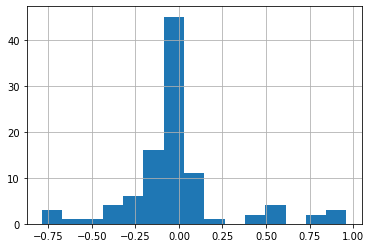

In [48]:
errors = y_test - lasso_7.predict(X_test_scaled[selected_cols])
errors.hist(bins=15)

## Most Important Variables

Let's now visually inspect the most important variables of our model.

Text(0.5, 1.0, 'Feature Importance')

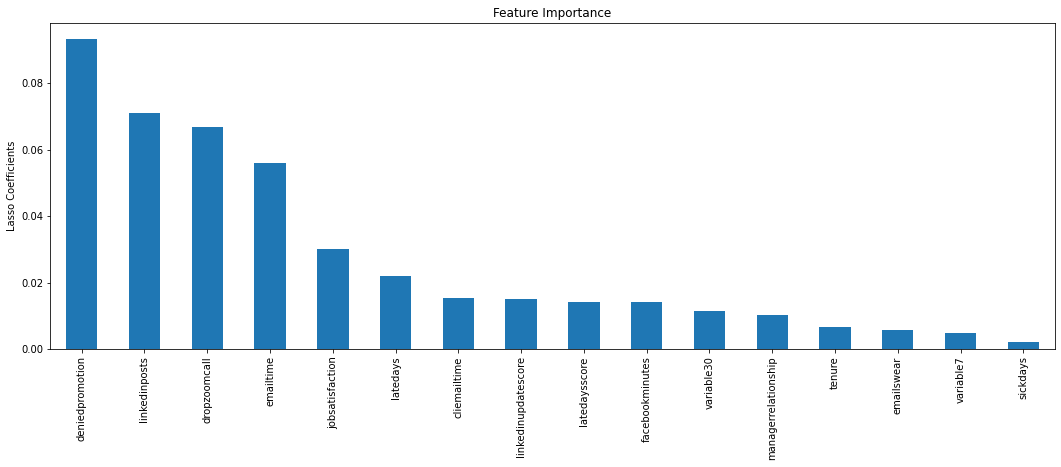

In [49]:
importance = pd.Series(np.abs(lasso_7.coef_.ravel()))
importance.index = selected_cols
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Lasso Coefficients")
plt.title("Feature Importance")

## Finally - All of the Above in One Go

In [50]:
df = pd.read_csv('Hyp_attrition_bigdata.csv')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df, df['quitnow'], train_size=102, random_state=7)

In [52]:
scaler = StandardScaler().fit(X_train[train_vars])
X_train_scaled = pd.concat([X_train[['new_id', 'quitnow']].reset_index(drop=True),
                            pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)], axis=1)

X_test_scaled = pd.concat([X_test[['new_id', 'quitnow']].reset_index(drop=True),
                           pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)], axis=1)

In [ ]:
reg = LassoCV(cv=10, max_iter=100000, random_state=7, n_jobs=-1).fit(X_train_scaled[train_vars], y_train)

In [ ]:
print("Training Set Score: {}".format(reg.score(X_train_scaled[train_vars], y_train)))
print("Test Set Score: {}".format(reg.score(X_test_scaled[train_vars], y_test)))